# Titanic Prediction

In [266]:
import pandas as pd
import numpy as np

In [267]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# Baseline

In [268]:
train_base = df_train[df_train['Sex'] == 'female']

In [269]:
baseline = np.mean(train_base.Survived == 1)
baseline

0.7420382165605095

In [270]:
def kaggle(accuracy):
    diference = 0.7655/0.7420
    return f'Kaggle: {accuracy * diference}'

In [271]:
kaggle(0.7420)

'Kaggle: 0.7654999999999998'

# Validation with Numerics features

In [272]:
variables = df_train.columns[(df_train.dtypes != 'object')].drop(['Survived', 'PassengerId'])

In [273]:
df_train[variables].info() 
# all are numeric, than let's try the model, but survived and passengerId couldn't have, 
# it's necessary drop, than after I had printed the info I changed the variables above cell, look up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [275]:
X = df_train[variables].fillna(-1).copy() # change the NaN or Null to -1
y = df_train['Survived']

Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5, random_state=0)

mdl = RandomForestClassifier(random_state=0, n_estimators=100)
mdl.fit(Xtrain, ytrain)

prediction = mdl.predict(Xvalid)
acc_rf = np.mean(yvalid == prediction)

# Comparation accuracy
print(f'Baseline is: {baseline}')
print(f'Accuracy is: {acc_rf}')
print(kaggle(acc_rf))

Baseline is: 0.7420382165605095
Accuracy is: 0.6973094170403588
Kaggle: 0.7193940144803161


# Test Features

In [283]:
surname = ['Mr.', 'Mrs', 'Miss', 'Master', 'Rev.', 'Dr', 'Col.', 'Sir.', 'Major', 'Don.', 'Capt']
for rep in surname:
    for name in test['Name'][test.Name.str.contains(rep, regex=False)]:
        if rep in ['Col.', 'Major', 'Capt']:
            test.replace(name, 'Army', inplace=True)
        elif rep in ['Sir.', 'Don.']:
            test.replace(name, 'Mr.', inplace=True)
        else:
            test.replace(name, rep, inplace=True)

for title in test.Name:
    if title not in ['Mr.', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Army']:
        test.replace(title, 'Miss', inplace=True)

test = pd.concat([test, pd.get_dummies(test['Name'], prefix='Name')], axis=1)


In [284]:
features = ['Pclass', 'Age', 'SibSp',
            'Parch', 'Fare', 'Name_Army', 'Name_Dr',
            'Name_Master', 'Name_Miss', 'Name_Mr.', 'Name_Mrs', 'PassengerId', 'Survived']

In [285]:
def model_random_forest(train, features):
    train, features = train, features
    X = train[features].fillna(-1).copy() # change the NaN or Null to -1
    y = train['Survived']

    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5, random_state=0)

    mdl = RandomForestClassifier(random_state=0, n_estimators=100)
    mdl.fit(Xtrain.drop(['Survived', 'PassengerId'], axis=1), ytrain)

    prediction = mdl.predict(Xvalid.drop(['Survived', 'PassengerId'], axis=1))
    acc_rf = np.mean(yvalid == prediction)

    # Comparation accuracy
    print(f'Baseline is: {baseline}')
    print(f'Accuracy is: {acc_rf}')
    print(kaggle(acc_rf))

In [286]:
prediction = model_random_forest(train, features)

Baseline is: 0.7420382165605095
Accuracy is: 0.7825112107623319
Kaggle: 0.8072942477608692


In [287]:
def submmission_random_forest(train, features, test, name_file):
    train, features = train, features
    X = train[features]
    y = train['Survived']

    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5, random_state=0)

    mdl = RandomForestClassifier(random_state=0, n_estimators=100)
    mdl.fit(Xtrain.drop(['Survived', 'PassengerId'], axis=1), ytrain)

    prediction = mdl.predict(test.drop(['PassengerId'], axis=1))

    sub = pd.DataFrame({
        'PassengerId':test['PassengerId'],
        'Survived':sub})
    
    return sub.to_csv(name_file, index=False)

In [288]:
# submmission_random_forest(train, features, test, 'sub_310320_name_I.csv')

###   RETURN TO DATA EXPLORATORY AND PRE-PROCESSING    ######

In [289]:
def get_worst(train, features):
    train, features = train, features
    X = train[features].fillna(-1).copy() # change the NaN or Null to -1
    y = train['Survived']

    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.5, random_state=0)

    mdl = RandomForestClassifier(random_state=0, n_estimators=100)
    mdl.fit(Xtrain.drop(['Survived', 'PassengerId'], axis=1), ytrain)

    prediction = mdl.predict(Xvalid.drop(['Survived', 'PassengerId'], axis=1))
    
    worst = Xvalid.copy()
    worst['prediction'] = prediction
    worst = worst[worst.Survived != worst.prediction].copy()
    
    return worst

In [290]:
worst = get_worst(train, features)

In [291]:
worst.Age.value_counts().head()

-1.0     16
 18.0     5
 29.0     5
 32.0     5
 45.0     4
Name: Age, dtype: int64

In [292]:
(worst[worst['Age'] == -1].shape[0] / worst.shape[0])*100

16.49484536082474

In [293]:
import seaborn as sns
%matplotlib inline

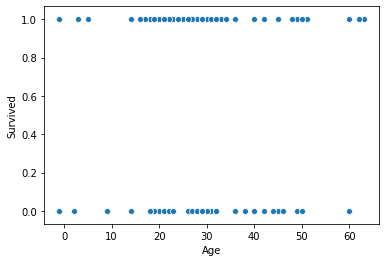

In [294]:
sns.scatterplot(worst.Age, worst.Survived)

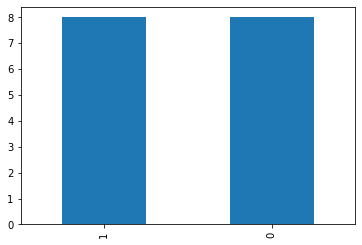

In [295]:
worst[worst.Age == -1]['Survived'].value_counts().plot('bar')

In [296]:
worst.Age.describe()

count    97.000000
mean     25.494845
std      16.931310
min      -1.000000
25%      18.000000
50%      26.000000
75%      36.000000
max      63.000000
Name: Age, dtype: float64

In [297]:
worst.Age.median()

26.0

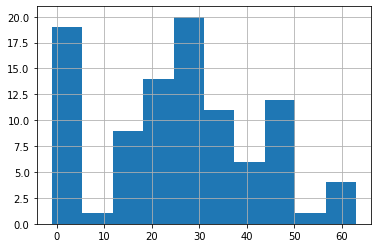

In [298]:
worst['Age'].hist()

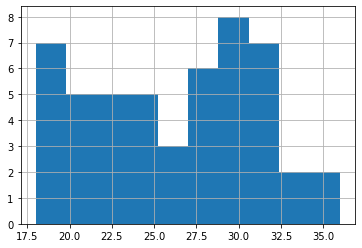

In [299]:
worst['Age'][(worst['Age'] >= 18) & (worst['Age'] <= 36)].hist()

In [300]:
worst['Age'][(worst['Age'] >= 18) & (worst['Age'] <= 36)].describe()

count    50.000000
mean     26.100000
std       5.135908
min      18.000000
25%      22.000000
50%      26.500000
75%      30.000000
max      36.000000
Name: Age, dtype: float64

In [301]:
mean = worst['Age'][(worst['Age'] >= 18) & (worst['Age'] <= 36)].mean()

In [302]:
worst.Age.replace(-1, mean, inplace=True)

In [303]:
train.Age.std(), worst.Age.std() # as you see std it's up yet, but it's better, let's change in train

(14.526497332334044, 12.228825587836795)

In [304]:
train.Age.mean(), test.Age.mean(), train.Age.median(), test.Age.median()

(29.69911764705882, 30.272590361445783, 28.0, 27.0)

In [305]:
train.Age.fillna(mean, inplace=True)
test.Age.fillna(mean, inplace=True)

In [306]:
train.Age[train.Age == 26.10].groupby(train['Survived']).count(), 
test.Age.value_counts()

26.10    86
24.00    17
21.00    17
22.00    16
30.00    15
18.00    13
26.00    12
27.00    12
25.00    11
23.00    11
29.00    10
36.00     9
45.00     9
20.00     8
17.00     7
28.00     7
31.00     6
32.00     6
33.00     6
55.00     6
39.00     6
50.00     5
48.00     5
41.00     5
42.00     5
40.00     5
35.00     5
47.00     5
43.00     4
19.00     4
         ..
9.00      2
54.00     2
2.00      2
22.50     1
62.00     1
67.00     1
28.50     1
0.83      1
0.92      1
0.17      1
38.50     1
3.00      1
51.00     1
5.00      1
44.00     1
14.50     1
59.00     1
58.00     1
0.33      1
0.75      1
36.50     1
40.50     1
11.50     1
34.00     1
15.00     1
7.00      1
60.50     1
26.50     1
76.00     1
34.50     1
Name: Age, Length: 80, dtype: int64

In [307]:
model_random_forest(train, features)

Baseline is: 0.7420382165605095
Accuracy is: 0.7914798206278026
Kaggle: 0.8165469038956642


In [331]:
features.pop(features.index('test'))

'test'

In [332]:
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Name_Army',
 'Name_Dr',
 'Name_Master',
 'Name_Miss',
 'Name_Mr.',
 'Name_Mrs',
 'PassengerId']

In [308]:
submmission_random_forest(train, features, test, 'sub_310320_age_mean.csv')

ValueError: could not convert string to float: 'Mr.'

In [172]:
test[test.Fare == None]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Name_Master,Name_Miss,Name_Mr.,Name_Mrs,Name_Army,Name_Dr,Name_Master,Name_Miss,Name_Mr.,Name_Mrs
